In [1]:
import json
import numpy as np
import pandas as pd
import math
import os
# from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

In [4]:
# def prep_data(path1, path2, path3, path4):  
#     df_2016 = pd.read_csv(path1)
#     df_2017 = pd.read_csv(path2)
#     df_2018 = pd.read_csv(path3)
#     df_2019 = pd.read_csv(path4)
#     df_2016["season"] = "2016"
#     df_2017["season"] = "2017"
#     df_2018["season"] = "2018"
#     df_2019["season"] = "2019"
    
#     df_all_season = pd.concat([df_2016, df_2017, df_2018, df_2019]).reset_index(drop=True)
#     # Get only those rows which have 2 as the 5th digit in game_id (i.e. only regular season games)
#     df_all_season = df_all_season[df_all_season["game_id"].astype(str).str[5] == "2"]
#     df_all_season = df_all_season[df_all_season.rinkSide.notna() & df_all_season.coordinates_x.notna() & df_all_season.coordinates_y.notna()].reset_index(drop=True)
#     df_all_season["offensive_goal_post_x"] = [-89 if i=="right" else 89 for i in df_all_season["rinkSide"]]
#     df_all_season["offensive_goal_post_y"] = 0
#     df_all_season["shot_distance"] = df_all_season.apply(lambda x: np.sqrt((x['offensive_goal_post_x']-x['coordinates_x'])**2 + (x['offensive_goal_post_y']-x['coordinates_y'])**2), axis=1)
#     df_all_season['goal'] = np.where(df_all_season['event']=="Goal", 1, 0)
#     df_all_season['shot_angle'] = df_all_season.apply(lambda x: np.arcsin((x['offensive_goal_post_y']-x['coordinates_y'])/(x['shot_distance']+0.0001))*180/math.pi, axis=1)
#     df_all_season["empty_net"] = df_all_season["empty_net"].replace(np.nan, 0)
#     df_all_season['is_empty_net'] = np.where(df_all_season['empty_net']==True, 1, 0)
#     return df_all_season

# df_all_season = prep_data('2016_clean.csv', '2017_clean.csv', '2018_clean.csv', '2019_clean.csv')

In [2]:
df_all_season = pd.read_csv("df_all_season.csv") # Data from feature engineering 1

In [3]:
df_all_season

,game_id,period,period_time,team,event,coordinates_x,coordinates_y,secondary_type,empty_net,strength_name,rinkSide,shooter,goalie,season,offensive_goal_post_x,offensive_goal_post_y,shot_distance,goal,shot_angle,is_empty_net
0,2015020001,1.0,00:51,Toronto Maple Leafs,Shot,-55.0,6.0,Wrist Shot,False,NaN,right,Brad Boyes,Carey Price,2015,-89,0,34.525353,0,-10.007951,0
1,2015020001,1.0,01:05,Toronto Maple Leafs,Shot,-79.0,0.0,Snap Shot,False,NaN,right,Nazem Kadri,Carey Price,2015,-89,0,10.000000,0,0.000000,0
2,2015020001,1.0,01:06,Toronto Maple Leafs,Shot,-75.0,-1.0,Snap Shot,False,NaN,right,Nazem Kadri,Carey Price,2015,-89,0,14.035669,0,4.085588,0
3,2015020001,1.0,01:53,Toronto Maple Leafs,Shot,-55.0,-36.0,Wrist Shot,False,NaN,right,Daniel Winnik,Carey Price,2015,-89,0,49.517674,0,46.636455,0
4,2015020001,1.0,02:37,Toronto Maple Leafs,Shot,-61.0,-1.0,Tip-In,False,NaN,right,Joffrey Lupul,Carey Price,2015,-89,0,28.017851,0,2.045401,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305855,2018021271,3.0,15:37,San Jose Sharks,Shot,67.0,-19.0,Slap Shot,False,NaN,left,Joe Pavelski,Semyon Varlamov,2018,89,0,29.068884,0,40.814914,0
305856,2018021271,3.0,16:33,Colorado Avalanche,Shot,-78.0,1.0,Wrist Shot,False,NaN,right,Gabriel Landeskog,Martin Jones,2018,-89,0,11.045361,0,-5.194382,0
305857,2018021271,3.0,18:39,Colorado Avalanche,Shot,-82.0,10.0,Wrist Shot,False,NaN,right,Gabriel Landeskog,Martin Jones,2018,-89,0,12.206556,0,-55.007309,0
305858,2018021271,3.0,18:40,Colorado Avalanche,Shot,-81.0,1.0,Wrist Shot,False,NaN,right,Carl Soderberg,Martin Jones,2018,-89,0,8.062258,0,-7.124928,0


In [4]:
x_train, x_val, y_train, y_val = train_test_split(df_all_season.drop(['goal'],axis=1), df_all_season['goal'], test_size=0.20, random_state=42)

In [5]:
y_train.value_counts()

0    221757
1     22931
Name: goal, dtype: int64

In [6]:
lr_dist = LogisticRegression().fit(x_train[['shot_distance']], y_train)
y_pred = lr_dist.predict(x_val[['shot_distance']])
score = accuracy_score(y_val.values,y_pred)
y_val_pred = lr_dist.predict_proba(x_val[['shot_distance']])[::,1]

In [7]:
y_val.values

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [8]:
y_val_pred

array([0.13613727, 0.0684673 , 0.06622679, ..., 0.08286942, 0.11519549,
       0.02554494])

Baseline: ROC AUC=0.500
Goal Prob: ROC AUC=0.681


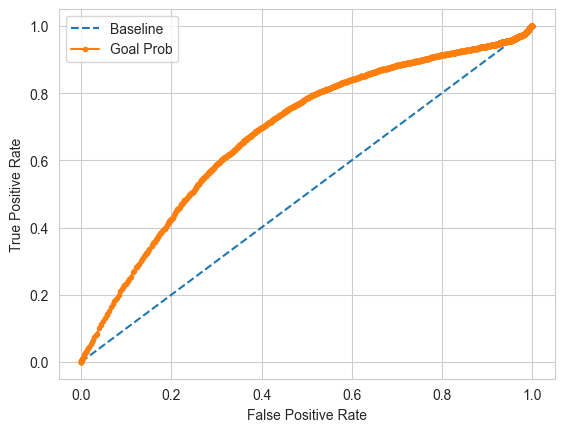

In [9]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y_val))]
ns_auc = roc_auc_score(y_val, ns_probs)
lr_auc = roc_auc_score(y_val, y_val_pred)

print('Baseline: ROC AUC=%.3f' % (ns_auc))
print('Goal Prob: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_val, y_val_pred)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Goal Prob')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

In [10]:
def percentile(y_pred,y_true):
    df = pd.DataFrame()
    df['pred_prob'] = y_pred
    df['y_true'] = np.array(y_val)
    percentile = [[np.percentile(df['pred_prob'], i), np.percentile(df['pred_prob'], i+5)] for i in range(0,100,5)]
    return df, percentile

In [11]:
def goal_rate(df, percentile):
    goal_rate = []
    for i in range(0, len(percentile)):
        goals = len(df[(df['pred_prob']>percentile[i][0])&(df['pred_prob']<=percentile[i][1])&(df['y_true']==1)])
        no_goals = len(df[(df['pred_prob']>percentile[i][0])&(df['pred_prob']<=percentile[i][1])&(df['y_true']==0)])
        goal_rate.append((goals*100)/(goals+no_goals))
    return goal_rate

In [12]:
def cumulative_proportion(df, percentile):
    total_goal = len(df[df['y_true']==1])
    cum_prop = []
    for i in range(0, len(percentile)-1):
        goals = len(df[(df['pred_prob']>=percentile[i][0]) & (df['y_true']==1)])
        cum_prop.append(goals*100/total_goal)
    cum_prop.append(0)
    return cum_prop

In [13]:
shot_prob_percentile = [i for i in range(0,100,5)]
df_dist, percentile_dist = percentile(y_val_pred,y_val)
goal_rate_dist = goal_rate(df_dist, percentile_dist)
cum_prop_dist = cumulative_proportion(df_dist, percentile_dist)

In [14]:
lr_angle = LogisticRegression().fit(x_train[['shot_angle']], y_train)
y_pred_angle = lr_angle.predict(x_val[['shot_angle']])
score = accuracy_score(y_val.values,y_pred_angle)
y_val_pred_angle = lr_angle.predict_proba(x_val[['shot_angle']])[::,1]
df_angle, percentile_angle = percentile(y_val_pred_angle,y_val)
goal_rate_angle = goal_rate(df_angle, percentile_angle)
cum_prop_angle = cumulative_proportion(df_angle, percentile_angle)

In [15]:
lr_dist_angle = LogisticRegression().fit(x_train[['shot_distance','shot_angle']], y_train)
y_pred_dist_angle = lr_dist_angle.predict(x_val[['shot_distance','shot_angle']])
score = accuracy_score(y_val.values,y_pred_dist_angle)
y_val_pred_dist_angle = lr_dist_angle.predict_proba(x_val[['shot_distance','shot_angle']])[::,1]
df_dist_angle, percentile_dist_angle = percentile(y_val_pred_dist_angle,y_val)
goal_rate_dist_angle = goal_rate(df_dist_angle, percentile_dist_angle)
cum_prop_dist_angle = cumulative_proportion(df_dist_angle, percentile_dist_angle)

In [16]:
import random
import numpy as np
random_baseline = np.random.uniform(low=0.0, high=1.0, size= len(y_val))#[random.uniform(0, 1) for i in  y_val]
df_rand, percentile_rand = percentile(random_baseline,y_val)
goal_rate_rand = goal_rate(df_rand, percentile_rand)
cum_prop_rand = cumulative_proportion(df_rand, percentile_rand)

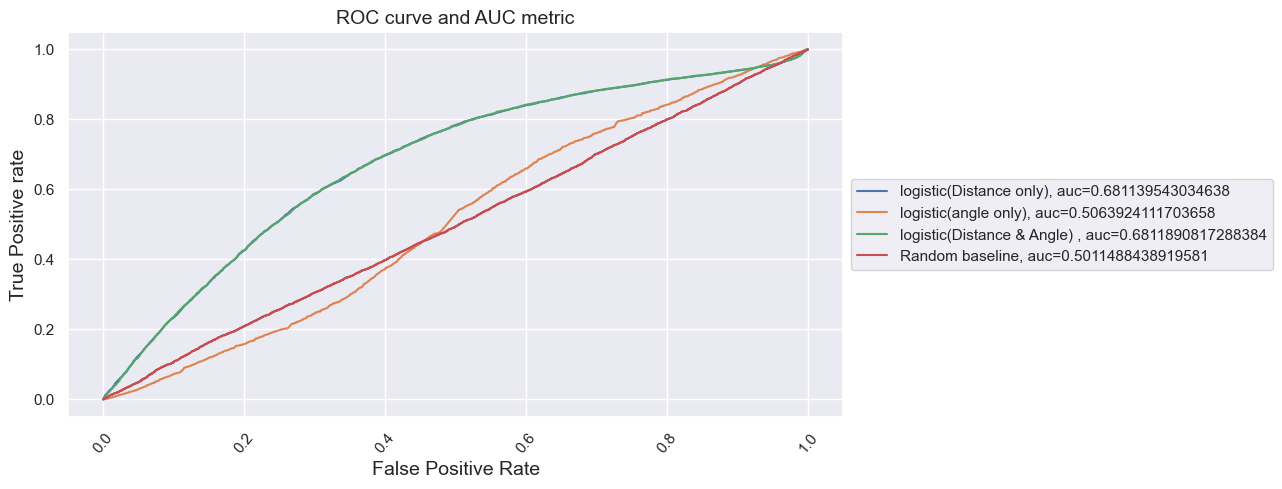

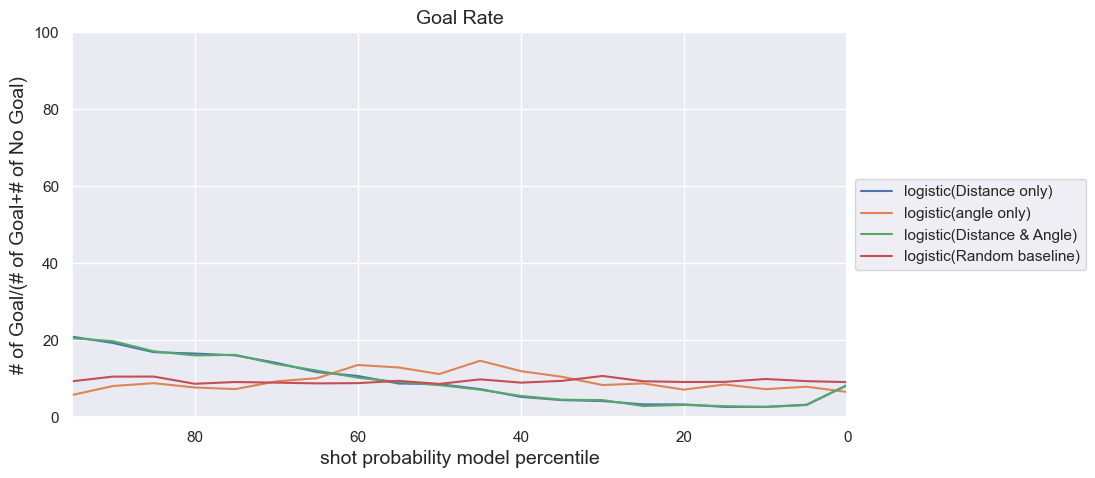

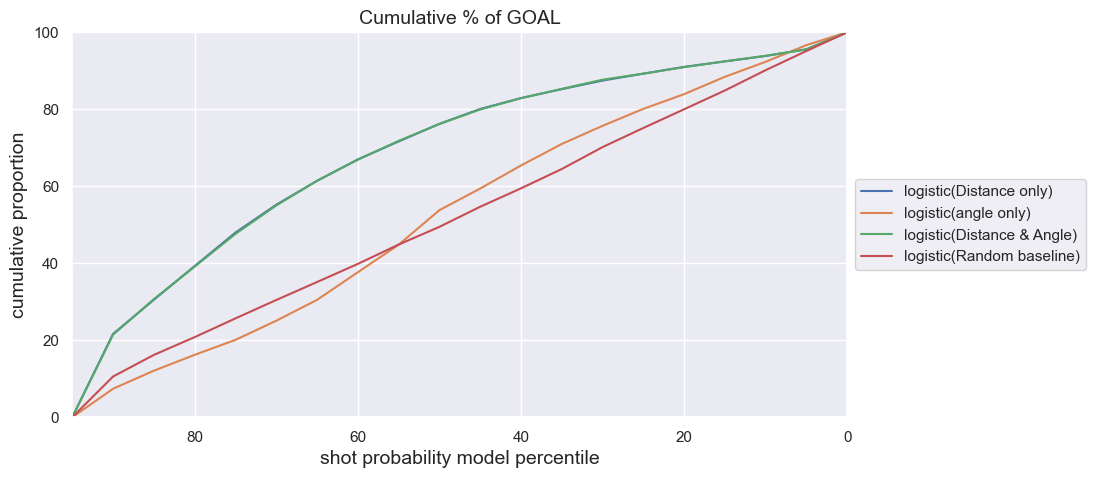

Text(0.5, 1.0, 'Reliability diagram')

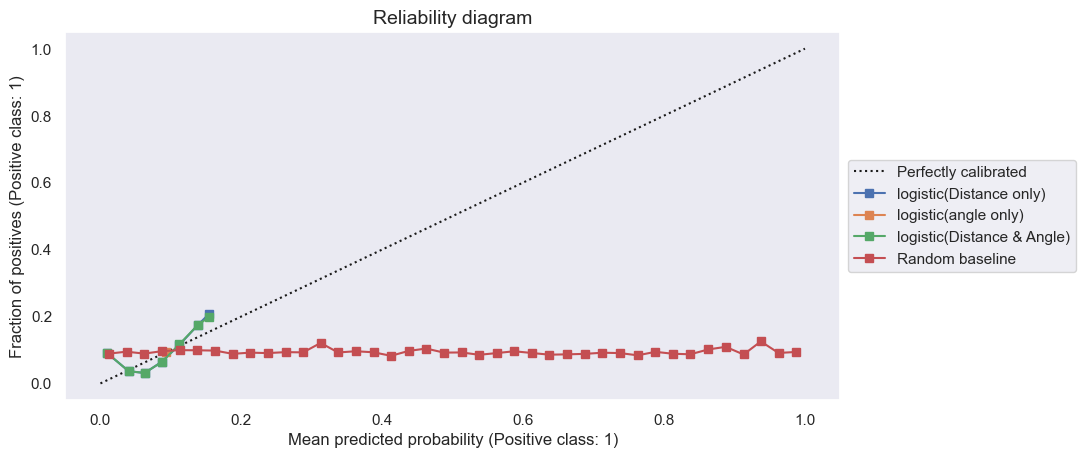

In [17]:
from matplotlib.gridspec import GridSpec
from sklearn.calibration import calibration_curve, CalibrationDisplay
from sklearn import metrics

sns.set(rc={'figure.figsize':(10,5)})
fpr_dist, tpr_dist, _ = metrics.roc_curve(y_val, y_val_pred)
auc_dist = metrics.roc_auc_score(y_val, y_val_pred)
plt.plot(fpr_dist,tpr_dist,label="logistic(Distance only), auc="+str(auc_dist))

fpr_angle, tpr_angle, _ = metrics.roc_curve(y_val, y_val_pred_angle)
auc_angle = metrics.roc_auc_score(y_val, y_val_pred_angle)
plt.plot(fpr_angle,tpr_angle,label="logistic(angle only), auc="+str(auc_angle))

fpr_dist_angle, tpr_dist_angle, _ = metrics.roc_curve(y_val, y_val_pred_dist_angle)
auc_dist_angle = metrics.roc_auc_score(y_val, y_val_pred_dist_angle)
plt.plot(fpr_dist_angle,tpr_dist_angle,label="logistic(Distance & Angle) , auc="+str(auc_dist_angle))

fpr_random, tpr_random, _ = metrics.roc_curve(y_val, random_baseline)
auc_random = metrics.roc_auc_score(y_val, random_baseline)
plt.plot(fpr_random,tpr_random,label="Random baseline, auc="+str(auc_random))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=50)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive rate', fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("ROC curve and AUC metric",fontsize=14)
plt.show()


plt.plot(shot_prob_percentile,goal_rate_dist , label="logistic(Distance only)")
plt.plot(shot_prob_percentile,goal_rate_angle, label="logistic(angle only)")
plt.plot(shot_prob_percentile,goal_rate_dist_angle, label="logistic(Distance & Angle)")
plt.plot(shot_prob_percentile,goal_rate_rand, label="logistic(Random baseline)")
plt.xlim(max(shot_prob_percentile), min(shot_prob_percentile))
plt.ylim(0, 100)
plt.xlabel('shot probability model percentile', fontsize=14)
plt.ylabel('# of Goal/(# of Goal+# of No Goal)', fontsize=14)
plt.title("Goal Rate",fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(shot_prob_percentile, cum_prop_dist, label="logistic(Distance only)")
plt.plot(shot_prob_percentile, cum_prop_angle, label="logistic(angle only)")
plt.plot(shot_prob_percentile, cum_prop_dist_angle, label="logistic(Distance & Angle)")
plt.plot(shot_prob_percentile, cum_prop_rand, label="logistic(Random baseline)")
plt.xlim(max(shot_prob_percentile), min(shot_prob_percentile))
plt.ylim(0, 100)
plt.xlabel('shot probability model percentile', fontsize=14)
plt.ylabel('cumulative proportion', fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Cumulative % of GOAL",fontsize=14)
plt.show()

lt = [['shot_distance'], ['shot_angle'], ['shot_distance','shot_angle']]
clf_list = [(y_val_pred,'logistic(Distance only)'),(y_val_pred_angle,'logistic(angle only)'),(y_val_pred_dist_angle,'logistic(Distance & Angle)'),(random_baseline,"Random baseline")]


fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    display = CalibrationDisplay.from_predictions(

        y_val,
        clf,
        name=name,
        n_bins=40,
        ax=ax_calibration_curve,

    )
    calibration_displays[name] = display


ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Reliability diagram",fontsize=14)